# Information Retrieval

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib import pyplot as plt
import numpy as np

<img src="https://github.com/deeplearning-itba/NLP-Tecnicas-Tradicionales/blob/master/tf.png?raw=1" >
<img src="https://github.com/deeplearning-itba/NLP-Tecnicas-Tradicionales/blob/master/idf.png?raw=1" >
<img src="https://github.com/deeplearning-itba/NLP-Tecnicas-Tradicionales/blob/master/tfidf.png?raw=1" >

Cargamos el 20 Newsgroup, un corpus muy usado en NLP. Es una suerte de foro de internet. 

Página oficial: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [2]:
TNG_train = fetch_20newsgroups(subset="train",remove=('headers', 'footers', 'quotes'))

In [3]:
TNG_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [4]:
# Se trata de un corpus con 11314 documentos
len(TNG_train.data)

11314

In [5]:
# Le hacemos primero un CountVectorizer con Ngramas de N=1 es decir, unigramas. 
# El hiperparámetro ngram_range indica el mínimo y el máximo del ngrama. [1,1] significa unigrama. [1,2] significa unigramas y bigramas. [2,2] significa solo bigramas. Etc.
cv = CountVectorizer(ngram_range=[1,1], max_df=0.8, min_df=2, max_features=None, stop_words="english")

In [7]:
# Aprende el diccionario y devuelve la matríz término-documento (document-term)
TNG_cv = cv.fit_transform(TNG_train.data)

In [8]:
#Tamaño del vocabulario
print(f'El vocabulario es: {cv.get_feature_names_out()}')
print(f'El tamaño del vocabulario es: {len(cv.get_feature_names_out())}')

El vocabulario es: ['00' '000' '0000' ... 'zyra' 'zyxel' 'zz']
El tamaño del vocabulario es: 39115


In [9]:
# Por ejemplo la palabra "wondering" es la palabra 37946
cv.get_feature_names_out()[37946]

'wondering'

In [10]:
# La palabra 8308 es la palabra "car" que en el documento 0 aparece 4 veces
cv.get_feature_names_out()[8308]

'car'

In [11]:
# La matríz aprendida es la siguiente: 
# (# de documento, palabra) Frecuencia de la palabra
# Vemos que por ejemplo, la palabra "wondering" (37946) aparece 1 vez en el documento 0, y la palabra "car" (8308) aparece 4 veces
print(TNG_cv[0])

  (0, 37946)	1
  (0, 13755)	1
  (0, 8308)	4
  (0, 30936)	1
  (0, 11269)	1
  (0, 12709)	1
  (0, 32807)	1
  (0, 21663)	1
  (0, 20958)	1
  (0, 2582)	1
  (0, 13133)	1
  (0, 2918)	1
  (0, 8160)	1
  (0, 7618)	1
  (0, 12710)	1
  (0, 29041)	1
  (0, 32237)	1
  (0, 4348)	1
  (0, 7843)	1
  (0, 31406)	1
  (0, 29858)	1
  (0, 7279)	1
  (0, 20611)	1
  (0, 23553)	1
  (0, 13725)	1
  (0, 32669)	1
  (0, 38743)	1
  (0, 27879)	1
  (0, 17670)	1
  (0, 18895)	1
  (0, 15821)	1
  (0, 21665)	1
  (0, 22151)	1


In [43]:
# Ahora hacemos lo mismo pero con TF-IDF. 
tfidf = TfidfVectorizer(ngram_range=[1,1], max_df=0.8, min_df=2, max_features=None, stop_words="english")

In [44]:
TNG_tfidf = tfidf.fit_transform(TNG_train.data)

In [45]:
#Tamaño del vocabulario
print(f'El vocabulario es: {tfidf.get_feature_names_out()}')
print(f'El tamaño del vocabulario es {len(tfidf.get_feature_names_out())}')

El vocabulario es: ['00' '000' '0000' ... 'zyra' 'zyxel' 'zz']
El tamaño del vocabulario es 39115


In [46]:
# Los TF-IDF de las palabras que aparecen en el documento 0 son: 
print(TNG_tfidf[0])

  (0, 22151)	0.10396051237321427
  (0, 21665)	0.11007653069893181
  (0, 15821)	0.2324229188539594
  (0, 18895)	0.12286163476134078
  (0, 17670)	0.1294269337268942
  (0, 27879)	0.16708065283081955
  (0, 38743)	0.09748726353486545
  (0, 32669)	0.16901913983257422
  (0, 13725)	0.14844163424911688
  (0, 23553)	0.1349446029089722
  (0, 20611)	0.07206126976917929
  (0, 7279)	0.13390755224706044
  (0, 29858)	0.12624893011850072
  (0, 31406)	0.15125511337699807
  (0, 7843)	0.20333333052721358
  (0, 4348)	0.14571395198164722
  (0, 32237)	0.11737033758458042
  (0, 29041)	0.0929308972760759
  (0, 12710)	0.1790749113452763
  (0, 7618)	0.2559007494060315
  (0, 8160)	0.10918185278570516
  (0, 2918)	0.2132164593387706
  (0, 13133)	0.13111279915073967
  (0, 2582)	0.21526992187435123
  (0, 20958)	0.1430729961195483
  (0, 21663)	0.13994963781616476
  (0, 32807)	0.16942365889853395
  (0, 12709)	0.15368535290883154
  (0, 11269)	0.10895113485078661
  (0, 30936)	0.1315248374330207
  (0, 8308)	0.482131979041

In [47]:
# La palabra 22151 es la palabra "mail" que en el documento 0 aparece 1 vez
tfidf.get_feature_names_out()[22151]

'mail'

# Cálculo del Document Frecuency de cada palabra

In [48]:
doc_freq = np.array(TNG_cv.astype(bool).sum(axis=0)).flatten()

In [49]:
# Así, en doc_freq tengo la cantidad de apariciones de cada una de las palabras
doc_freq

array([243, 262,   7, ...,   2,   4,   7])

In [50]:
# El vacabulario es de 39115 palabras, pero en total hay 693602 palabras (porque algunas palabras se repiten)
doc_freq.sum()

693602

In [51]:
# La palabra "mail" aparece 721 veces en total
mail=doc_freq[22151]
print(mail)

721


In [52]:
# Hay en total 11314 documentos (esto ya lo habíamos calculado)
N=len(TNG_train.data)
print(N)

11314


In [53]:
# La palabra "mail" aparece en 1149 de esos documentos
df=0
name=cv.get_feature_names_out()[22151]
for n in TNG_train.data: 
  if name in n: df+=1
print(df)

1149


In [54]:
# El Inverse document frecuency es: 
idf = np.log(N/df)
print(idf)

2.2871488980543453


In [55]:
# El TF es la cantidad de veces que aparece el término en el documento sobre la cantidad de palabras en el documento
tf=1/33
print(tf)

0.030303030303030304


In [56]:
tfidf_manual=tf*idf
print(tfidf_manual)

0.06930754236528319


¿Por qué no coincide con lo que calcula Sklearn? 
Porque sklearn normaliza a la norma Euclidea

<img src="https://miro.medium.com/max/630/1*nQVx6kHQRgz5B2-7TrI3LA.png">

Y ajusta con +1 la fórmula para evitar los casos igual a cero. 

<img src="https://miro.medium.com/max/290/1*ckcDta2x-ZskdzvG0gjD-A.png">

https://towardsdatascience.com/measure-text-weight-using-tf-idf-in-python-plain-code-and-scikit-learn-50cb1e4375ad

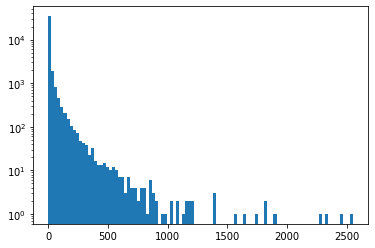

In [57]:
# Podemos ver la cola larga de la frecuencia de palabras
# Incluso habiendo eliminado stopwords e incluso en escala logarítmica
a = plt.hist(doc_freq, bins=100,log=True)
plt.show()

# Topic modelling

In [58]:
# Además de los documentos el corpus tiene información de las categorías
TNG_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [59]:
TNG_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


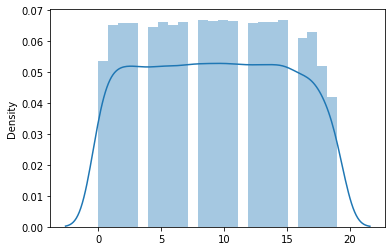

In [67]:
import seaborn as sns
sns.distplot(TNG_train.target)

In [60]:
# El documento 0 es: 
TNG_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [61]:
# Y tiene como tópico el número 7
TNG_train.target[0]

7

In [62]:
# que corresponde a la categoría autos
TNG_train.target_names[7]

'rec.autos'

In [63]:
# El TFIDF del doc 0 con máximo valor es el 8308
TNG_tfidf[0].argmax()

8308

In [64]:
# Que corresponde a la palabra auto! 
tfidf.get_feature_names_out()[TNG_tfidf[0].argmax()]

'car'

In [66]:
# Estos son los resultados para los primeros 10 documentos. 
# Está bien, pero podría estar mejor.
for doc in range(0,10):
  print(f'{doc}: {TNG_train.target_names[TNG_train.target[doc]]}: {tfidf.get_feature_names_out()[TNG_tfidf[doc].argmax()]}')

0: rec.autos: car
1: comp.sys.mac.hardware: poll
2: comp.sys.mac.hardware: 180
3: comp.graphics: weitek
4: sci.space: std
5: talk.politics.guns: weapons
6: sci.med: thank
7: comp.sys.ibm.pc.hardware: scsi
8: comp.os.ms-windows.misc: icons
9: comp.sys.mac.hardware: board


In [68]:
# Para mejorarlo vamos a eliminar los números y lemmatizar las palabras
def letters_only(astr) :
  return astr.isalpha()

In [77]:
import nltk
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

nltk.download('names')
nltk.download('wordnet')
nltk.download('omw-1.4')

all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [91]:
# todo a lowercase
data_=[]
for story in TNG_train.data:
    new=story.lower()
    data_.append(new)

In [89]:
TNG_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [93]:
data_[0]

'i was wondering if anyone out there could enlighten me on this car i saw\nthe other day. it was a 2-door sports car, looked to be from the late 60s/\nearly 70s. it was called a bricklin. the doors were really small. in addition,\nthe front bumper was separate from the rest of the body. this is \nall i know. if anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [100]:
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
newsgroups_lemma=[]
for story in data_:
    words=word_tokenize(story)
    text=""
    for words in word_tokenize(story):
        if letters_only(words):
          lemma_word=lemmatizer.lemmatize(words)
          extra=" "+str(lemma_word)
          text+=extra
    newsgroups_lemma.append(text)

In [101]:
newsgroups_lemma[0]

' i wa wondering if anyone out there could enlighten me on this car i saw the other day it wa a sport car looked to be from the late early it wa called a bricklin the door were really small in addition the front bumper wa separate from the rest of the body this is all i know if anyone can tellme a model name engine spec year of production where this car is made history or whatever info you have on this funky looking car please'

In [102]:
TNG_tfidf_cleaned = tfidf.fit_transform(newsgroups_lemma)

In [103]:
for doc in range(0,10):
  print(f'{doc}: {TNG_train.target_names[TNG_train.target[doc]]}: {tfidf.get_feature_names_out()[TNG_tfidf_cleaned[doc].argmax()]}')

0: rec.autos: car
1: comp.sys.mac.hardware: poll
2: comp.sys.mac.hardware: powerbook
3: comp.graphics: weitek
4: sci.space: bug
5: talk.politics.guns: weapon
6: sci.med: thank
7: comp.sys.ibm.pc.hardware: burst
8: comp.os.ms-windows.misc: icon
9: comp.sys.mac.hardware: board
